In [14]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'; plt.rcParams['font.size'] = 15# 차트 글꼴
import matplotlib as mpl; mpl.rcParams['axes.unicode_minus'] = False # - 깨짐 방지
import seaborn as sns
%matplotlib inline

최소제곱법

 - 어떤 계의 해방정식을 근사적으로 구하는 방법으로, 근사적으로 구하려는 해와 실제 해의 오차의 제곱의 합이 최소가 되는 해
 - 실제 값(y)과 가설(y_hat)에 의한 예측 값의 차이가 가장 작은 계수 계산



최소제곱법으로 기울기(가중치)와 y절편을 계산할 데이터를 만든다.

In [7]:
x = [2, 4, 6, 8] # 공부시간 x
y = [81, 93, 91, 97] # 시험점수 y

공부시간과 시험점수 데이터를 판다스 데이터프레임으로 만든다.

In [9]:
df=pd.DataFrame(columns=['x','y']) # 빈 데이터프레임
df.loc[:,'x']=x
df.loc[:,'y']=y
df

,x,y
0,2,81
1,4,93
2,6,91
3,8,97


공부시간과 시험점수 시각화

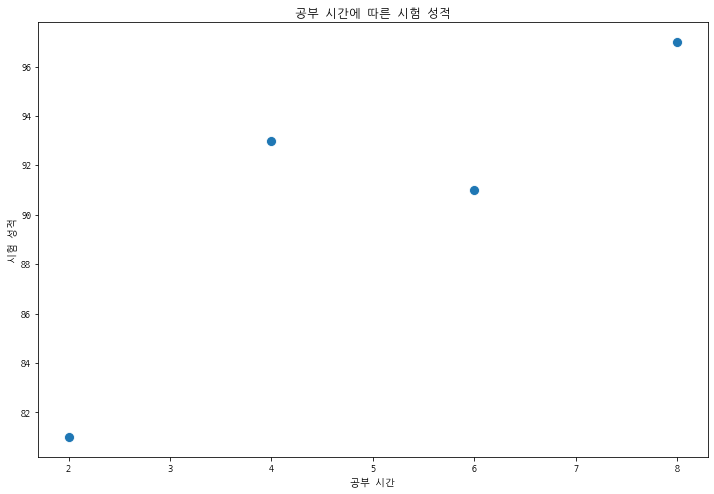

In [19]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=df, x='x', y='y', s=100) # 산점도
plt.title('공부 시간에 따른 시험 성적')
plt.xlabel('공부 시간')
plt.ylabel('시험 성적')
plt.show()


기울기 

$$\frac{\sum_{i=0}^{n-1}(x_i- \bar x)(y_i- \bar y)}{\sum_{i=0}^{n-1}(x_i - \bar x)^2}$$

In [24]:
mean_x=np.mean(x) # 겅부시간 평균
mean_y=np.mean(y) # test score 평균
print('겅부시간 평균:{}, 시험점수 평균:{}'.format(mean_x, mean_y))

겅부시간 평균:5.0, 시험점수 평균:90.5


In [25]:
# 기울기 공식에서 분자 계산하는 함수
def top(x, mean_x, y, mean_y):
    total=0.0
    for i in range(len(x)):
        total+=(x[i]-mean_x)*(y[i]-mean_y)
    return total

numerator = top(x, mean_x, y, mean_y)
print(numerator)

46.0


In [27]:
# 기울기 공식에서 분모 계산하는 함수
def bottom(x, mean_x):
    total=0.0
    for i in range(len(x)):
        total+=(x[i]-mean_x)**2
    return total

denominator = bottom(x,mean_x)
print(denominator)

20.0


In [28]:
print('기울기 공식에서 분자:{}, 분모:{}'.format(numerator, denominator))
a = numerator/denominator
print('기울기:{}'.format(a))

기울기 공식에서 분자:46.0, 분모:20.0
기울기:2.3


y절편 공식 : Y평균-a*x평균
$$\bar y - a \times \bar x$$

In [29]:
b = mean_y - (mean_x * a)
print('y절편: {}'.format(b))

y절편: 79.0
